## Importing the required libraries and tools for this classification project

In [8]:
 # Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj
from sklearn.metrics import confusion_matrix, accuracy_score
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

%matplotlib inline

import xgboost
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [9]:
# Importing the dataset

dataset = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [10]:
# Lets look at the top 5 rows
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### The dataset consists of various markers for each patient. Namely:


*   age: Age of the patient
*   anaemia: Is the patient anaemic
*   creatine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)
*   diabetes: If the patient has diabetes (boolean)
*   ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)
*   high_blood_pressure: If the patient has hypertension (boolean)
*   platelets: Platelets in the blood (kiloplatelets/mL)
*   serum_creatine: Level of serum creatinine in the blood (mg/dL)
*   serum_sodium: Level of serum sodium in the blood (mEq/L)
*   sex: Woman or man (binary)
*   smoking: If the patient smokes or not (boolean)
*   time: Follow-up period (days)
*   DEATH_EVENT: If the patient deceased during the follow-up period (boolean)




### Data Pre-Processing

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [12]:
# Checking for null values
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## We implemented feature selection to choose the top 6 features to develop our classification models

[0.09526685 0.02689912 0.07372716 0.02981744 0.12363615 0.0266752
 0.07406577 0.11428393 0.08567819 0.02621117 0.02508669 0.29865234]


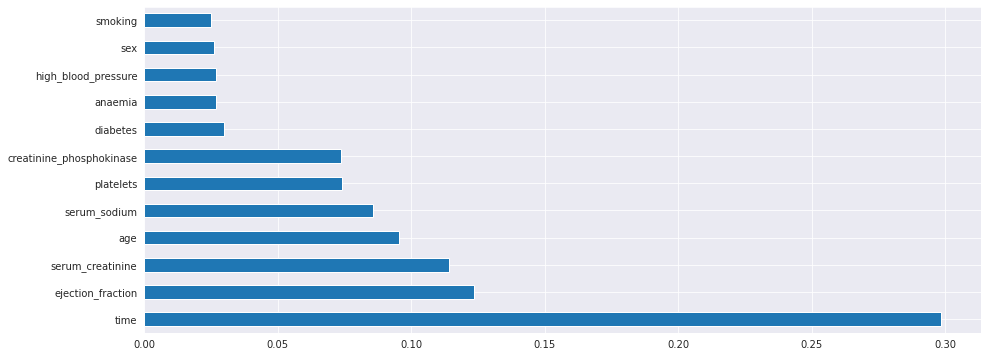

In [ ]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [14]:
#function for removing outliers
def remove_outlier(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower  = q1-1.5*iqr
    upper = q3+1.5*iqr
    outliers = []
    for i in range (df[column].shape[0]):
        if df[column][i] < lower or df[column][i] > upper:
            outliers.append(i)
    df.drop(df.index[outliers], inplace = True)
    df.reset_index(drop = True, inplace = True)

## Checking for presence of outliers

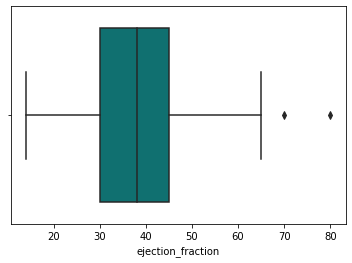

In [22]:
# Boxplot for ejection_fraction
# trial and error shown that removing the two outliers improve the accuracy score by more than 5%
sns.boxplot(x = dataset.ejection_fraction, color = 'teal')
plt.show()

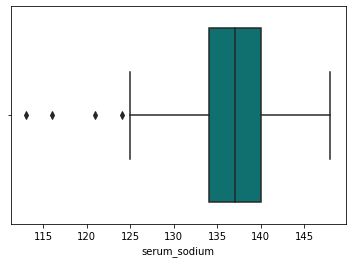

In [23]:
sns.boxplot(x = dataset.serum_sodium, color = 'teal')
plt.show()

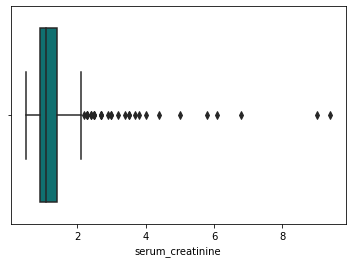

In [24]:
# Boxplot for serum creatinine
sns.boxplot(x=dataset.serum_creatinine, color = 'teal')
plt.show()

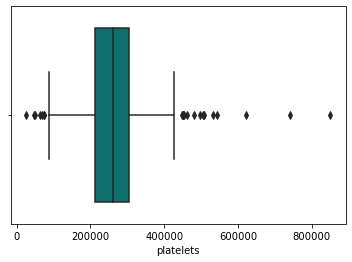

In [25]:
# Boxplot for platelets
sns.boxplot(x=dataset.platelets, color = 'teal')
plt.show()

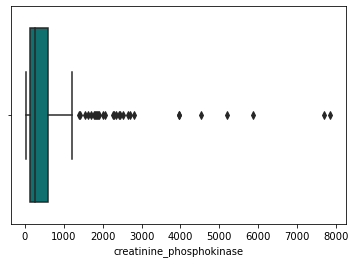

In [26]:
# Boxplot for creatinine_phosphokinase
sns.boxplot(x=dataset.creatinine_phosphokinase, color = 'teal')
plt.show()

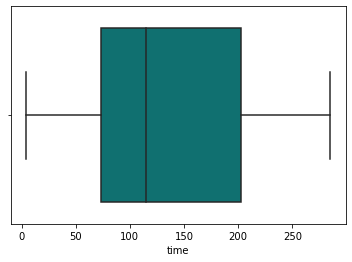

In [27]:
# Boxplot for time
sns.boxplot(x=dataset.time, color = 'teal')
plt.show()

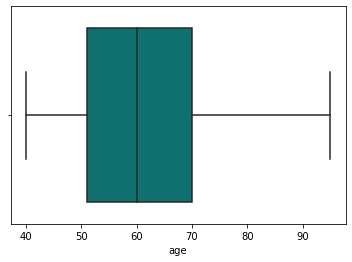

In [28]:
# Boxplot for age
sns.boxplot(x=dataset.age, color = 'teal')
plt.show()

## Before removing the outliers, we first need to understand the context of the outliers within each feature. The team identified that some outliers were within the range of the values and hence are not considered outliers and instead is important in helping predict the mortalities

In [29]:
#remove the outliers
for column in ['ejection_fraction', 'serum_sodium']:
    remove_outlier(dataset, column) 


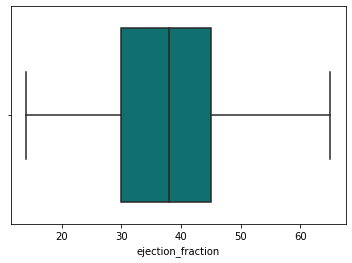

In [30]:
sns.boxplot(x = dataset.ejection_fraction, color = 'teal')
plt.show()

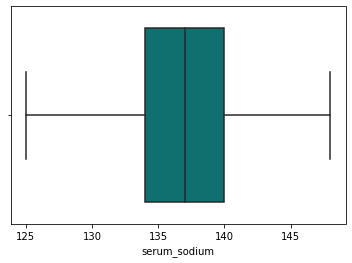

In [31]:
sns.boxplot(x = dataset.serum_sodium, color = 'teal')
plt.show()

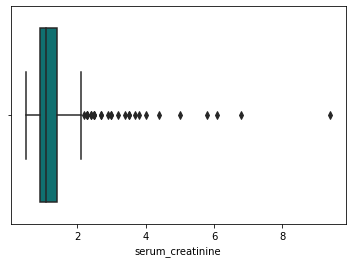

In [32]:
# Boxplot for serum creatinine
sns.boxplot(x=dataset.serum_creatinine, color = 'teal')
plt.show()

## Now we will be doing exploratory data analysis in order to gain further insights for our top 6 selected features

In [33]:
# Now lets categorize the above histogram by DEATH_EVENT vs Age

import plotly.express as px
fig = px.histogram(dataset, x="age", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns, 
                   title ="Distribution of AGE Vs DEATH_EVENT", 
                   labels={"age": "AGE"},
                   template="plotly_dark"
                  )
fig.show()

In [34]:
# Now lets categorize the above histogram by DEATH_EVENT vs creatinine_phosphokinase

import plotly.express as px
fig = px.histogram(dataset, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns,
                   title ="Distribution of CREATININE PHOSPHOKINASE Vs DEATH_EVENT", 
                   labels={"creatinine_phosphokinase": "CREATININE PHOSPHOKINASE"},
                   template="plotly_dark")
fig.show()

In [35]:
# Now lets categorize the above histogram by DEATH_EVENT vs Ejection_fraction

import plotly.express as px
fig = px.histogram(dataset, x="ejection_fraction", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns,
                   title ="Distribution of EJECTION FRACTION Vs DEATH_EVENT", 
                   labels={"ejection_fraction": "EJECTION FRACTION"},
                   template="plotly_dark",
                   )
fig.show()

In [36]:
# Now lets categorize the above histogram by DEATH_EVENT vs serum_creatinine

import plotly.express as px
fig = px.histogram(dataset, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=dataset.columns,
                   title ="Distribution of SERUM CREATININE Vs DEATH_EVENT", 
                   labels={"serum_creatinine": "SERUM CREATININE"},
                   template="plotly_dark",
                   )
fig.show()

In [37]:
# Now lets categorize the above histogram by DEATH_EVENT vs serum_sodium

import plotly.express as px
fig = px.histogram(dataset, x="serum_sodium", color="DEATH_EVENT", marginal="violin",hover_data=dataset.columns,
                   title ="Distribution of SERUM SODIUM Vs DEATH_EVENT", 
                   labels={"serum_sodium": "SERUM SODIUM"},
                   template="plotly_dark",
                   )
fig.show()

In [38]:
# Now lets categorize the above histogram by DEATH_EVENT vs Time

import plotly.express as px
fig = px.histogram(dataset, x="time", color="DEATH_EVENT", marginal="violin",hover_data=dataset.columns,
                   title ="Distribution of TIME Vs DEATH_EVENT", 
                   labels={"time": "TIME"},
                   template="plotly_dark",
                   )
fig.show()


## ** Creating the Train - Test Split preparation**

In [ ]:
Features = ['time','ejection_fraction','serum_creatinine', 'age', 'serum_sodium', 'creatinine_phosphokinase']
# Features = ['time','ejection_fraction','serum_creatinine']
x = dataset[Features]
y = dataset["DEATH_EVENT"]

In [ ]:
#oversampling to deal with imbalanced data
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state = 0)

x_smote, y_smote = smote.fit_resample(x, y)

In [ ]:
# Based on feature selection, we choose these attributes to build our model
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler #scaling all the features

sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Now we will be developing our classification models. We have choose to develop 10 classification models and decided the compare the performance between the models.

## **Logistic Regression**

In [ ]:
# logistic regression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
log_reg_rec = recall_score(y_test, log_reg_pred)
log_reg_f1 = f1_score(y_test, log_reg_pred)

print("Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))
print("Recall of Logistic Regression is ", "{:.2f}%".format(100* log_reg_rec))
print("F1 score of Logistic Regression is ", "{:.2f}%".format(100* log_reg_f1))

Accuracy of Logistic Regression is :  80.25%
Recall of Logistic Regression is  92.68%
F1 score of Logistic Regression is  82.61%


## **Support Vector Classifier**

In [ ]:
# SVC

sv_clf = SVC()
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
sv_clf_rec = recall_score(y_test, sv_clf_pred)
sv_clf_f1 = f1_score(y_test, sv_clf_pred)

print("Accuracy of SVC is : ", "{:.2f}%".format(100* sv_clf_acc))
print("Recall of SVC is ", "{:.2f}%".format(100* sv_clf_rec))
print("F1 score of SVC is ", "{:.2f}%".format(100* sv_clf_f1))

Accuracy of SVC is :  81.48%
Recall of SVC is  95.12%
F1 score of SVC is  83.87%


## **K Nearest Neighbours Classifier**

In [ ]:
 # K Neighbors Classifier

kn_clf = KNeighborsClassifier(n_neighbors=7)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)
kn_acc = accuracy_score(y_test, kn_pred)
kn_rec = recall_score(y_test, kn_pred)
kn_f1 = f1_score(y_test, kn_pred)

print("Accuracy of K Neighbors Classifier is : ", "{:.2f}%".format(100* kn_acc))
print("Recall of K Neighbors Classifier is ", "{:.2f}%".format(100* kn_rec))
print("F1 score of K Neighbors Classifier is ", "{:.2f}%".format(100* kn_f1))

Accuracy of K Neighbors Classifier is :  87.65%
Recall of K Neighbors Classifier is  95.12%
F1 score of K Neighbors Classifier is  88.64%


## **Random Forest Classifier**




In [ ]:
# Random Forest Classifier

r_clf = RandomForestClassifier(max_features=0.5, max_depth=3, random_state=0)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)
r_acc = accuracy_score(y_test, r_pred)
r_rec = recall_score(y_test, r_pred)
r_f1 = f1_score(y_test, r_pred)

print("Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))
print("Recall of Random Forest Classifier is ", "{:.2f}%".format(100* r_rec))
print("F1 score of Random Forest Classifier is ", "{:.2f}%".format(100* r_f1))

Accuracy of Random Forest Classifier is :  87.65%
Recall of Random Forest Classifier is  92.68%
F1 score of Random Forest Classifier is  88.37%


## **Decision Tree Classifier**

In [ ]:
# Decision Tree Classifier

dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
dt_rec = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

print("Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))
print("Recall of Decision Tree Classifier is ", "{:.2f}%".format(100* dt_rec))
print("F1 score of Decision Tree Classifier is ", "{:.2f}%".format(100* dt_f1))

Accuracy of Decision Tree Classifier is :  81.48%
Recall of Decision Tree Classifier is  95.12%
F1 score of Decision Tree Classifier is  83.87%


## **Gradient Booster Classifier**

In [ ]:
# Gradient Boosting Classifier

gradientboost_clf = GradientBoostingClassifier(max_depth=3, learning_rate = 0.001, subsample = 0.7, min_samples_split = 3, random_state = 0)
gradientboost_clf.fit(x_train,y_train)
gradientboost_pred = gradientboost_clf.predict(x_test)
gradientboost_acc = accuracy_score(y_test, gradientboost_pred)
gradientboost_rec = recall_score(y_test, gradientboost_pred)
gradientboost_f1 = f1_score(y_test, gradientboost_pred)

print("Accuracy of Gradient Boosting is : ", "{:.2f}%".format(100* gradientboost_acc))
print("Recall of Gradient Boosting is ", "{:.2f}%".format(100* gradientboost_rec))
print("F1 score of Gradient Boosting is ", "{:.2f}%".format(100* gradientboost_f1))


Accuracy of Gradient Boosting is :  87.65%
Recall of Gradient Boosting is  90.24%
F1 score of Gradient Boosting is  88.10%


## **XGBoost**

In [ ]:
#no training - default values
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

y_pred = classifier.predict(x_test)

ac_xgboost = accuracy_score(y_test, y_pred)
rec_xgboost = recall_score(y_test, y_pred)
f1_xgboost = f1_score(y_test, y_pred)

print("Accuracy of XGBoost is ", "{:.2f}%".format(100* ac_xgboost))
print("Recall of XGBoosting is ", "{:.2f}%".format(100* rec_xgboost))
print("F1 score of XGBoosting is ", "{:.2f}%".format(100* f1_xgboost))


Accuracy of XGBoost is  83.95%
Recall of XGBoosting is  92.68%
F1 score of XGBoosting is  85.39%


In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(max_depth= 5, min_child_weight= 3, gamma = 0.0, colsample_bytree = 1.0, 
                           subsample = 0.7, reg_alpha = 0.001, learning_rate=0.001, 
                           objective= 'binary:logistic',)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac_xgboost = accuracy_score(y_test, y_pred)
rec_xgboost = recall_score(y_test, y_pred)
f1_xgboost = f1_score(y_test, y_pred)

print("Accuracy of XGBoost is ", "{:.2f}%".format(100* ac_xgboost))
print("Recall of XGBoosting is ", "{:.2f}%".format(100* rec_xgboost))
print("F1 score of XGBoosting is ", "{:.2f}%".format(100* f1_xgboost))

Accuracy of XGBoost is  91.36%
Recall of XGBoosting is  95.12%
F1 score of XGBoosting is  91.76%


## **CatBoost**

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 76kB/s 


In [ ]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier(verbose = False)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [ ]:
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_catboost = accuracy_score(y_test, y_pred)
rec_catboost = recall_score(y_test, y_pred)
f1_catboost = f1_score(y_test, y_pred)

print("Accuracy of CatBoost is ", "{:.2f}%".format(100* acc_catboost))
print("Recall of CatBoost is ", "{:.2f}%".format(100* rec_catboost))
print("F1 score of CatBoost is ", "{:.2f}%".format(100* f1_catboost))


Accuracy of CatBoost is  88.89%
Recall of CatBoost is  92.68%
F1 score of CatBoost is  89.41%


In [ ]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier(iterations = 1000, depth = 5, l2_leaf_reg = 5, 
                                learning_rate = 0.001, loss_function='Logloss', 
                                verbose = False)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [ ]:

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_catboost = accuracy_score(y_test, y_pred)
rec_catboost = recall_score(y_test, y_pred)
f1_catboost = f1_score(y_test, y_pred)

print("Accuracy of CatBoost is ", "{:.2f}%".format(100* acc_catboost))
print("Recall of CatBoost is ", "{:.2f}%".format(100* rec_catboost))
print("F1 score of CatBoost is ", "{:.2f}%".format(100* f1_catboost))


Accuracy of CatBoost is  90.12%
Recall of CatBoost is  95.12%
F1 score of CatBoost is  90.70%


## **ANN (Neural Network)**

In [ ]:
import tensorflow as tf
# Initialising the ANN
tf.random.set_seed(0)
ann = tf.keras.models.Sequential()

In [ ]:
# Adding the input layer and the first hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

In [ ]:
# Adding the second hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

In [ ]:
# Adding the third hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

In [ ]:
# Adding the fourth hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

In [ ]:
# Adding the output layer

ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
# Compiling the ANN

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics=[tf.keras.metrics.Recall()] )

In [ ]:
# Training the ANN on the training set

ann.fit(x_train, y_train, batch_size = 16, epochs = 100)

Epoch 1/100
21/21 [==============================] - 1s 1ms/step - loss: 0.6915 - recall_1: 0.0000e+00
Epoch 2/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6856 - recall_1: 0.0000e+00
Epoch 3/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6758 - recall_1: 0.0381
Epoch 4/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6612 - recall_1: 0.1447
Epoch 5/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6496 - recall_1: 0.3958
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6186 - recall_1: 0.5437
Epoch 7/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6092 - recall_1: 0.5458
Epoch 8/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5803 - recall_1: 0.5145
Epoch 9/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5754 - recall_1: 0.6497
Epoch 10/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5277 - recall_1: 0.6848
E

In [ ]:
# Predicting the test set results

y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac_ann = accuracy_score(y_test,y_pred)
rec_ann = recall_score(y_test, y_pred)
f1_ann = f1_score(y_test, y_pred)

print("Accuracy of ANN is ", "{:.2f}%".format(100* ac_ann))
print("Recall of ANN is ", "{:.2f}%".format(100* rec_ann))
print("F1 score of ANN is ", "{:.2f}%".format(100* f1_ann))

Accuracy of ANN is  81.48%
Recall of ANN is  95.12%
F1 score of ANN is  83.87%


## Naives Bayes 

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
p =nb.predict(x_test)
acc_naiveBayes =accuracy_score(y_test,p)
rec_naiveBayes = recall_score(y_test,p)
f1_naiveBayes = f1_score(y_test, p)

print("Accuracy of NaiveBayes is ", "{:.2f}%".format(100* acc_naiveBayes))
print("Recall of NaiveBayes is ", "{:.2f}%".format(100* rec_naiveBayes))
print("F1 score of NaiveBayes is ", "{:.2f}%".format(100* f1_naiveBayes))


Accuracy of NaiveBayes is  83.95%
Recall of NaiveBayes is  85.37%
F1 score of NaiveBayes is  84.34%


## Model Comparison for Accuracy

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 
              'Random Forest',   
              'Decision Tree', 'Gradient Booster','xgboost','CatBoost','ANN','NaiveBayes'],
    'Score': [log_reg_acc, kn_acc, sv_clf_acc, 
              r_acc, dt_acc, gradientboost_acc,ac_xgboost,acc_catboost,ac_ann,acc_naiveBayes
              ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,xgboost,0.913580
7,CatBoost,0.901235
1,KNN,0.876543
3,Random Forest,0.876543
5,Gradient Booster,0.876543
9,NaiveBayes,0.839506
2,SVM,0.814815
4,Decision Tree,0.814815
8,ANN,0.814815
0,Logistic Regression,0.802469


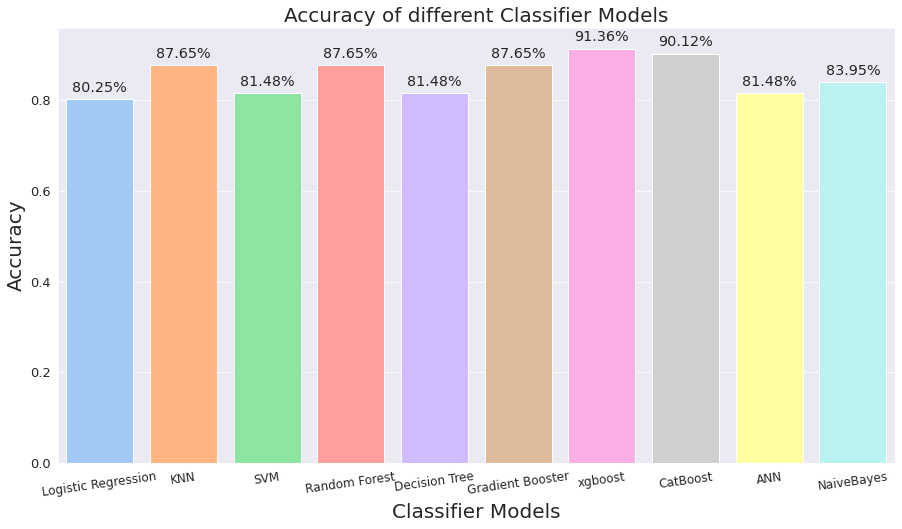

In [ ]:
plt.rcParams['figure.figsize']=15,8
sns.set_style("darkgrid")
ax = sns.barplot(x=models.Model, y=models.Score, palette = "pastel", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

## Model Comparison for Recall

In [ ]:
models_recall = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 
              'Random Forest',   
              'Decision Tree', 'Gradient Booster','catboost','xgboost','ANN','NaiveBayes'],
    'Score': [log_reg_rec, kn_rec, sv_clf_rec, 
              r_rec, dt_rec, gradientboost_rec,rec_catboost,rec_xgboost,rec_ann,rec_naiveBayes 
              ]})
models_recall.sort_values(by='Score', ascending=False)

,Model,Score
1,KNN,0.951220
2,SVM,0.951220
4,Decision Tree,0.951220
6,catboost,0.951220
7,xgboost,0.951220
8,ANN,0.951220
0,Logistic Regression,0.926829
3,Random Forest,0.926829
5,Gradient Booster,0.902439
9,NaiveBayes,0.853659


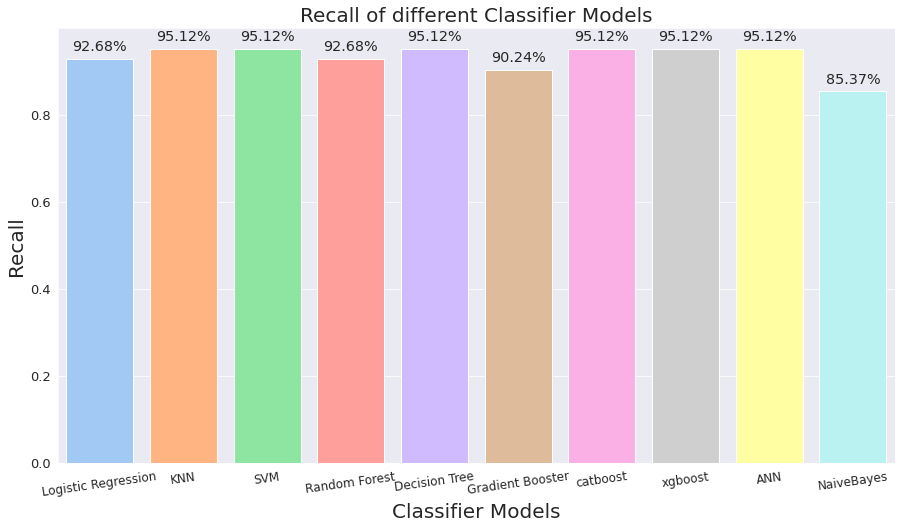

In [ ]:
plt.rcParams['figure.figsize']=15,8 
sns.set_style("darkgrid")
ax = sns.barplot(x=models_recall.Model, y=models_recall.Score, palette = "pastel", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("Recall", fontsize = 20)
plt.title("Recall of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

## Model Comparison for F1 Score

In [ ]:
models_f1 = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 
              'Random Forest',   
              'Decision Tree', 'Gradient Booster','catboost','xgboost','ANN','NaiveBayes'],
    'Score': [log_reg_f1, kn_f1, sv_clf_f1, 
              r_f1, dt_f1, gradientboost_f1,f1_catboost,f1_xgboost,f1_ann,f1_naiveBayes 
              ]})
models_f1.sort_values(by='Score', ascending=False)

,Model,Score
7,xgboost,0.917647
6,catboost,0.906977
1,KNN,0.886364
3,Random Forest,0.883721
5,Gradient Booster,0.880952
9,NaiveBayes,0.843373
2,SVM,0.838710
4,Decision Tree,0.838710
8,ANN,0.838710
0,Logistic Regression,0.826087


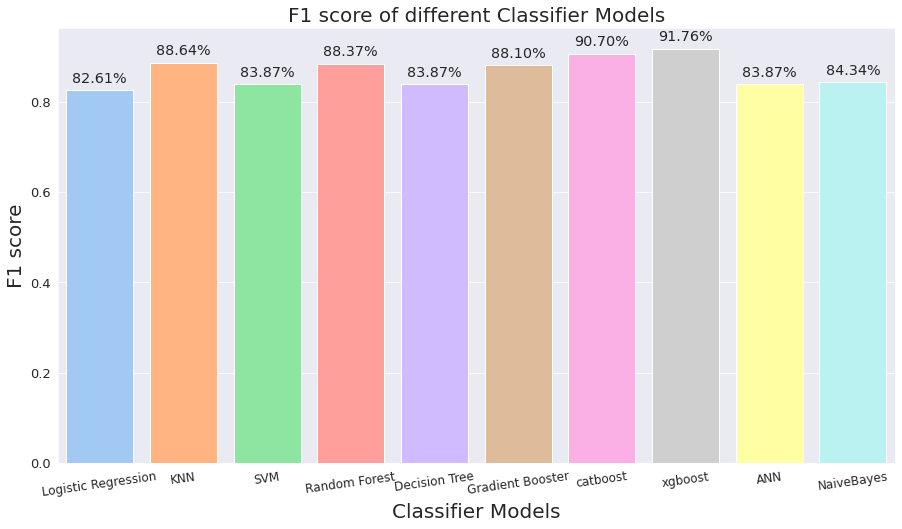

In [ ]:
plt.rcParams['figure.figsize']=15,8 
sns.set_style("darkgrid")
ax = sns.barplot(x=models_f1.Model, y=models_f1.Score, palette = "pastel", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("F1 score", fontsize = 20)
plt.title("F1 score of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

## From the results shown above, we can conclude that the XGBoost model outperform all the other models in terms of accuracy, recall and F1 Score. 
## Hence it the best model to be utilized to predict mortalities caused by heart failure